In [1]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm    #to generate all Statistical models (linear regression)

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset

advertising = pd.read_csv("advertising.csv")

In [3]:
#Observe the data set: X1 = TV , X2 = Radio , X3 = Newspaper , Y = Sales (Target Variable)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
#Peeking the Data

advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising.describe()   # only works on the numerical features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


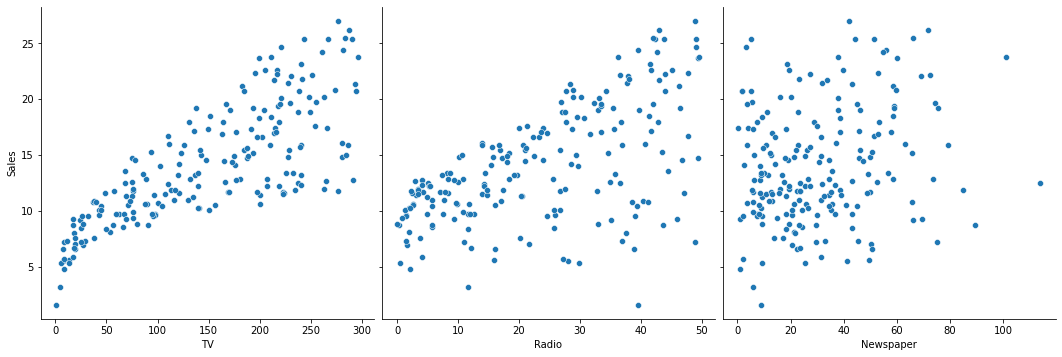

In [7]:
#Visualisation

sns.pairplot(advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')

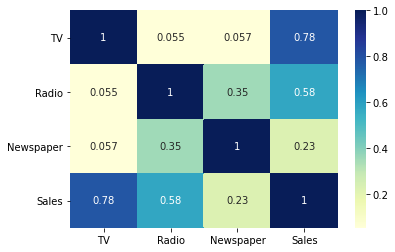

In [8]:
sns.heatmap(advertising.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [10]:
## defining the independent and dependent variables in the dataset.
#Presently working only with one independent variable 'TV'

X = advertising['TV']
y = advertising['Sales']

In [11]:
#Splitting the data into Train and Test (with split ratio = 70-30)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [8]:
X_train

170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
       ...  
73     129.4
144     96.2
118    125.7
189     18.7
99     135.2
Name: TV, Length: 140, dtype: float64

In [9]:
X_test.head()

119     19.4
77     120.5
148     38.0
149     44.7
154    187.8
Name: TV, dtype: float64

There are two ways to create Linear Regression model.
#### First Method: use Statsmodels.api
This method is mostly used my Statisticians to get more statistical measures as the final output.

In [13]:
import statsmodels.api as sm

In [14]:
#Adding a constant (to get an intercept)
X_train_sm = sm.add_constant(X_train)

In [15]:
#Fitting the regression model using OLS (of SM)

lr = sm.OLS(y_train, X_train_sm).fit()      #fit calculates the parameters m and c for us

In [16]:
lr.params       #the value mentioned next to X or independent variable is the slope

const    6.745302
TV       0.050244
dtype: float64

In [17]:
#Below is the detailed output obtained through this model. This output is only useful to Statisticians.

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.64e-32
Time:                        19:20:44   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.000       5.687       7.803
TV             0.0502      0.003     15.702      0.000       0.044       0.057
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.973
Skew:                          -0.201   Prob(JB):                        0.615
Kurtosis:                       2.932   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

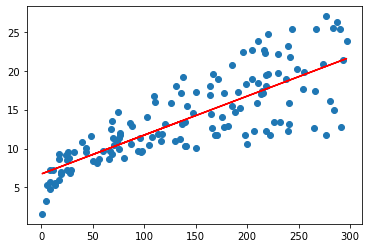

In [14]:
#Visualize the regression line - best fit line (working purely on the train data only!)
plt.scatter(X_train, y_train)      #original dataset
plt.plot(X_train, 6.74 + 0.050 * X_train, 'r')     # Y_pred = 6.74 + 0.050 * X_train , so it gives the best fit line
plt.show()

In [19]:
#Error Analysis (for the train dataset)

y_train_pred = lr.predict(X_train_sm)      #this command is same for all models

res = (y_train - y_train_pred)             #residual = actual Y - predicted Y

Text(0, 0.5, 'freq')

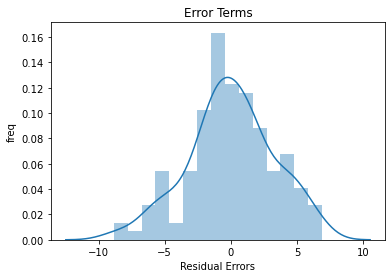

In [20]:
#PLotting the histogram of errors (histogram of residuals tells us about the shape of distribution of residuals)

sns.distplot(res, bins = 15)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [21]:
#Repeating the same set of steps for the test dataset

#Adding constant

X_test_sm = sm.add_constant(X_test)     #add the constant ( c ) is compulsory in statsmodel.api 

In [22]:
#Predicting
y_test_pred = lr.predict(X_test_sm)

In [23]:
res_test = (y_test - y_test_pred)      #true measure of model's performance

Text(0, 0.5, 'freq')

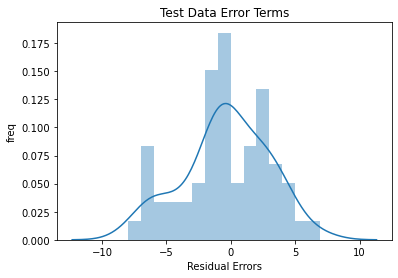

In [24]:
#PLotting the histogram of errors

sns.distplot(res_test, bins = 15)
plt.title('Test Data Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')

In [25]:
# for all evaluations we always use sklearn.metrics

from sklearn.metrics import r2_score        

r_sq = r2_score(y_test, y_test_pred)
r_sq


# Measured performance of the trained dataset must be higher than the performance of the test dataset
# if in case measured performance of the trained dataset is LESS than the performance of the test dataset ....overfitting of the model

# P (trained) < P(Test)

# if in case measured performance of the trainer dataset is 'much higher' than the performance of the test dataset , underfits
P(trained = 80) > P(test = 40)


# Ideally P(Trained) > P(test) this difference should be small

# For example: R2 for trained dataset as 64 , R2 for test dataset must be atleast above 60


0.5111616978794153

#### Second Method: using the sklearn.linear_model (LinearRegression) 
This is the most popular method among Data Scientists

In [26]:
#Splitting the data into Train and Test (with split ratio = 70-30)

from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [27]:
X_train_lm =  X_train_lm.values.reshape(-1,1)     #you want to convert the data in single column
X_test_lm = X_test_lm.values.reshape(-1,1)

#Y is by default a single column only! 
#X being the indpendent variable can have more than one column,so in order to convert it to a single column array
# we reshape it

In [28]:
#Method 2
from sklearn.linear_model import LinearRegression

lm = LinearRegression()    #instatiation

lm.fit(X_train_lm, y_train_lm)   #to calculate the parameters

LinearRegression()

In [29]:
print(lm.intercept_)    #constant or the c value in Y = mX + c

6.745302251222065


In [30]:
print(lm.coef_)    #slope

[0.05024351]


In [31]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [32]:
print(r2_score(y_train_lm, y_train_pred))

0.6411433688483876


In [33]:
print(r2_score(y_test_lm, y_test_pred))

0.5111616978794153


In [34]:
#Assignment: Adj R2, TV, TV+Radio, Radio+Newspaper, TV+Newspaper (R2, Adj R2, )
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']     #multiple independent variables
X = advertising[feature_cols]
y = advertising.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))


#Interview
#One independent variable , it is called 'Simple Linear Regression'
# mutliple independent variables , it is called 'Multiple Linear Regression'

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

In [35]:
#Assignment

#1. To see the variable importance through mix of R2 and Adj R2.
#2. To calculate the Evaluation Metrices at one place (R2, Adj R2, RMSE)
#sklearn.metrics.mean_squared_error (use this method to calculate RMSE)